<a href="https://colab.research.google.com/github/BonneyBoja/Data-MachineLearning-DeepLearning-GenAI-Projects/blob/main/image_classification_model_using_the_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


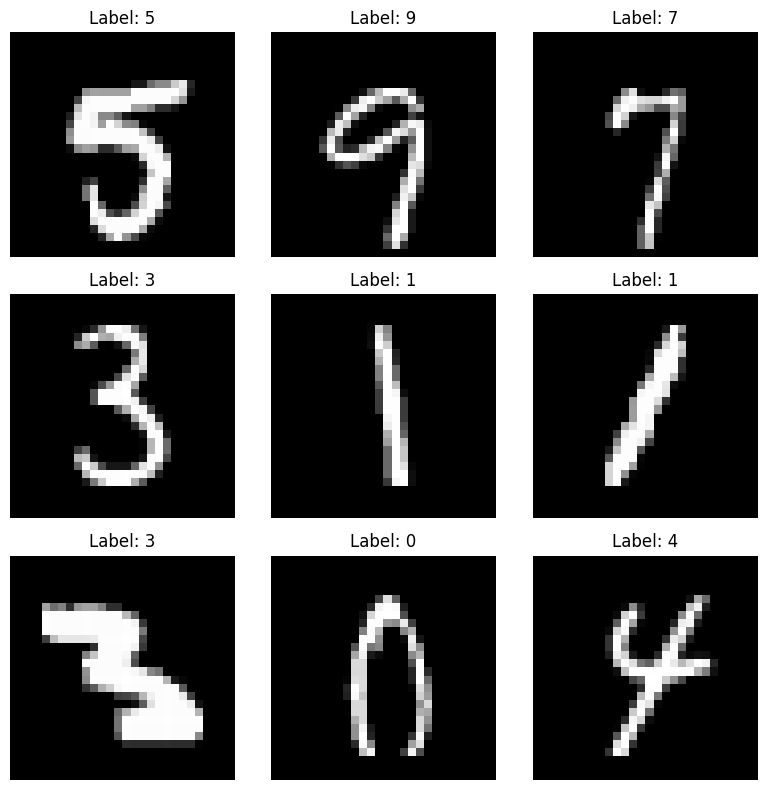

In [ ]:
# Visualize 9 random images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()
for i in range(9):
    # Select a random index
    idx = np.random.randint(0, X_train.shape[0])
    axes[i].imshow(X_train[idx], cmap='gray')
    axes[i].set_title(f"Label: {y_train[idx]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Normalize pixel values
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0

# Print the shape and min/max of a sample to confirm
print(f"Original min/max: {X_train.min()}/{X_train.max()}")
print(f"Normalized min/max: {X_train_norm.min()}/{X_train_norm.max()}")

Original min/max: 0/255
Normalized min/max: 0.0/1.0


In [ ]:
# One-hot encode the labels
num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

In [ ]:
# Print dataset shapes and confirm
print("\n--- Final Dataset Shapes ---")
print(f"X_train_norm shape: {X_train_norm.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test_norm shape: {X_test_norm.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")
print("--------------------------\n")


--- Final Dataset Shapes ---
X_train_norm shape: (60000, 28, 28)
y_train_encoded shape: (60000, 10)
X_test_norm shape: (10000, 28, 28)
y_test_encoded shape: (10000, 10)
--------------------------



In [ ]:
# Build the Sequential Model
model = Sequential([
    # Input Layer: Flattens the 28x28 image to a 784-dimensional vector
    Flatten(input_shape=(28, 28), name='input_flatten'),

    # Hidden Layer 1
    Dense(128, activation='relu', name='dense_128'),
    Dropout(0.3, name='dropout_1'),

    # Hidden Layer 2
    Dense(64, activation='relu', name='dense_64'),
    Dropout(0.3, name='dropout_2'),

    # Output Layer
    Dense(num_classes, activation='softmax', name='output_softmax')
])

# Print model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_softmax (Dense)          │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    X_train_norm, y_train_encoded,
    epochs=10,
    batch_size=128,
    validation_split=0.1 # 10% of training data for validation
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7135 - loss: 0.8985 - val_accuracy: 0.9553 - val_loss: 0.1586
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9216 - loss: 0.2694 - val_accuracy: 0.9663 - val_loss: 0.1174
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9404 - loss: 0.2043 - val_accuracy: 0.9688 - val_loss: 0.1069
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9499 - loss: 0.1702 - val_accuracy: 0.9745 - val_loss: 0.0904
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9575 - loss: 0.1458 - val_accuracy: 0.9763 - val_loss: 0.0850
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9632 - loss: 0.1253 - val_accuracy: 0.9768 - val_loss: 0.0763
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9648 - loss: 0.1169 - val_accuracy: 0.9790 - val_loss: 0.0720
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9692 - loss: 0.1021 - val_accuracy: 0

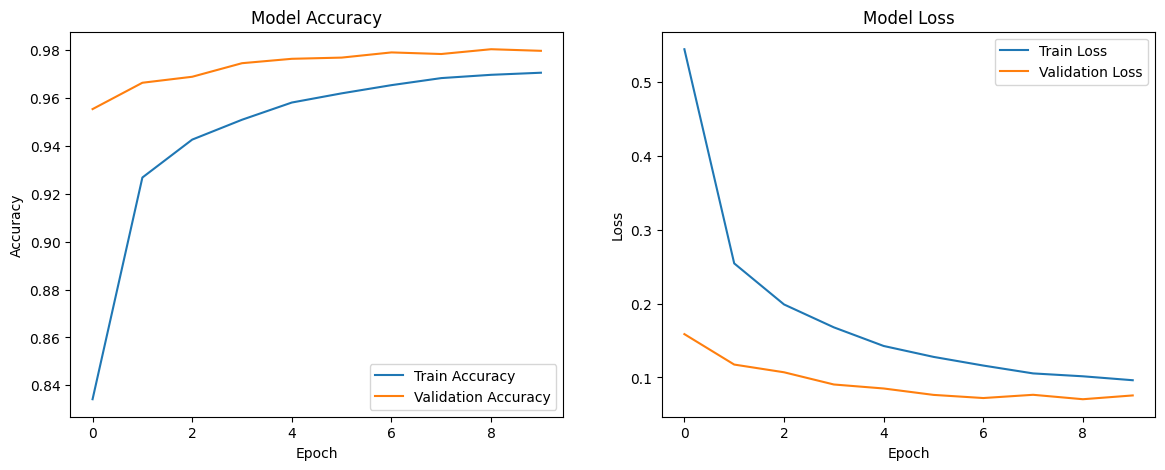

In [ ]:
# Plot training and validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(loc='lower right')

# Plot training & validation loss values
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
# Evaluate the model on the test set
loss, test_accuracy = model.evaluate(X_test_norm, y_test_encoded, verbose=0)

print(f"\n--- Final Test Evaluation ---")
print(f"Test Loss: {loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
print("---------------------------\n")


--- Final Test Evaluation ---
Test Loss: 0.0785
Final Test Accuracy: 97.68%
---------------------------



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


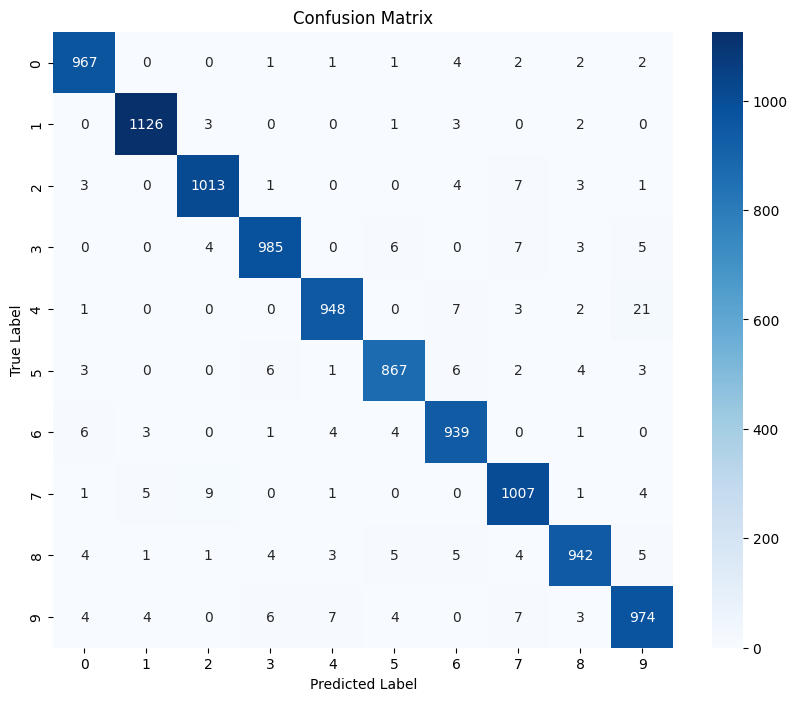


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

-----------------------------



In [ ]:
# Get predictions (probabilities)
y_pred_probs = model.predict(X_test_norm)

# Convert probabilities to class labels (the index of the max probability)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_labels)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred_labels, target_names=[str(i) for i in range(num_classes)]))
print("-----------------------------\n")